## Data augmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from helpers import read_mnist
from nn import NeuralNetwork

In [2]:
# Function for converting radians to degrees.
deg_to_rad = lambda deg: deg * (2*np.pi)/360

def expand_training_set(ims, labels, expansion_pct=0.1):
    """
    Given a training set, the data can be augmented using 'rotate', 'add_noise', and 'mirror'. 
    The training set will be augmented until it contains expansion_pct more data.
    """
    N = ims.shape[0]
    N_augmented = int(N * expansion_pct)
    N_new = N + N_augmented
    
    random_samples = np.random.choice(range(N), size=N_augmented, replace=False)
    for i in range(N_augmented):
        im = ims[random_samples[i]]
        label = labels[random_samples[i]]
        im = rotate(im)
        im = add_noise(im)
        im = mirror(im, label).reshape(1,28,28)
        ims = np.append(ims, im, axis=0)
        labels = np.append(labels, label)

    return ims, labels

def rotate(im, deg=None):
    """
    Performs discrete rotation using numpy. deg should be between -10 and 10.
    Potential optimizations:
    - Discretize options for rotations and precompute rotated coordinates.
    - Precompute rotation matrices
    - Use list comprehensions or other faster method instead of nested loops.
    Potential improvements:
    - Apply filters or interpolations, to avoid empty values.
    """
    if deg==None:
        deg = np.random.choice([-25,-20,-15,-10,-5,5,10,15,20,25], size=1)[0]
    else:
        # Ensure -20 < deg < 20
        deg = (deg+20)%40 - 20
    
    rad = deg_to_rad(deg)

    # Define rotation matrix.
    R = np.array([[np.cos(rad), -np.sin(rad)],
                  [np.sin(rad), np.cos(rad)]])
    
    im_rot = np.zeros(im.shape)
    center = np.array(im.shape) / 2
    
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            # Find old coordinates of current pixels.
            p_old = (R @ np.array([i,j] - center).T + center).astype(int)
            # Clip to keep inside image dimensions.
            p_old = np.clip(p_old, a_min=0, a_max=27)
            im_rot[i, j] = im[p_old[0], p_old[1]]

    return im_rot

def mult_noise(im, noise_level=0.1):
    """Add Gaussian noise through multiplication."""
    noise = np.random.normal(size=im.shape)*noise_level + 1
    noisy_im = np.abs(im * noise) # Deal with values < 0.
    noisy_im = 255 - np.abs(255 - noisy_im) # Deal with values between 255 and 510.
    noisy_im = np.clip(noisy_im, a_min=0, a_max=255) # Deal with values > 510.
    return noisy_im

def add_noise(im, noise_level=None):
    """Add Gaussian noise through addition, to deal with 0-values."""
    if noise_level==None:
        noise_level = np.random.beta(a=2, b=20, size=1)[0]
        
    noise = np.random.normal(size=(im.shape))*255*noise_level
        
    noisy_im = np.abs(im+noise)
    noisy_im = 255 - np.abs(255 - noisy_im) # Deal with values between 255 and 510.
    noisy_im = np.clip(noisy_im, a_min=0, a_max=255) # Deal with values > 510.
    return noisy_im

def mirror(im, label, axis=None):
    """Flip image along first or second axis, or a combination of both if axis=2 (i.e. rotate 180 degrees)."""
    if axis==None:
        axis = np.random.choice([0,1,2],size=1)[0]
    
    if not(label in [0, 8]):
        return im
    elif axis==2:
        return np.flip(np.flip(im, axis=0),axis=1)
    else:
        return np.flip(im, axis=axis)

## Demonstraion of functions:

In [3]:
# Import data for testing
ims, labels, a, t = read_mnist()

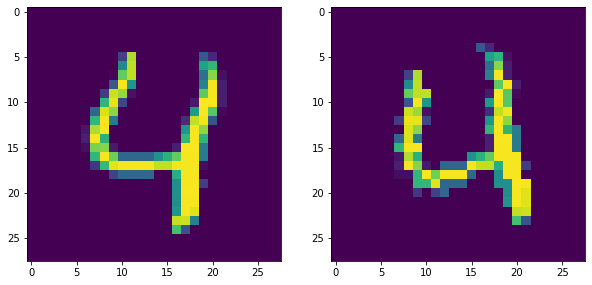

In [4]:
# Test of rotate-function.
im = ims[4]
deg = None

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(im)
ax[1].imshow(rotate(im, deg=deg))
plt.show()

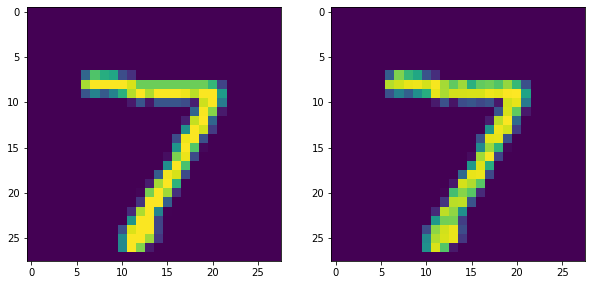

In [5]:
# Test of multiplicative noise function.
im = ims[0]
label = labels[0]

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(im)
ax[1].imshow(mult_noise(im, noise_level=0.1))
plt.show()

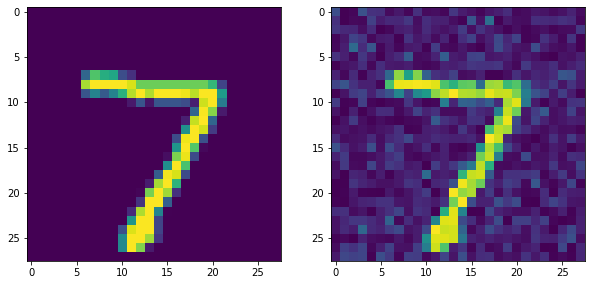

In [6]:
# Test of additive noise function.
im = ims[0]
label = labels[0]
noise_level=None

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(im)
ax[1].imshow(add_noise(im, noise_level=noise_level))
plt.show()

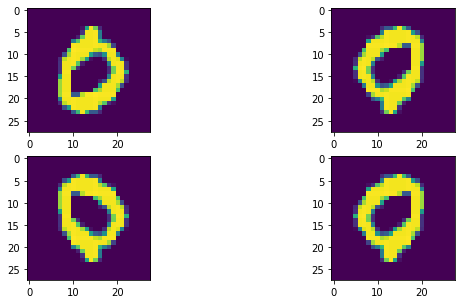

In [7]:
# Test of mirror function.
im = ims[3]
label = labels[3]

fig, ax = plt.subplots(2,2,figsize=(10,5))
ax = ax.ravel()
ax[0].imshow(im)
ax[1].imshow(mirror(im, label))
ax[2].imshow(mirror(im, label, axis=0))
ax[3].imshow(mirror(im, label, axis=2))
plt.show()

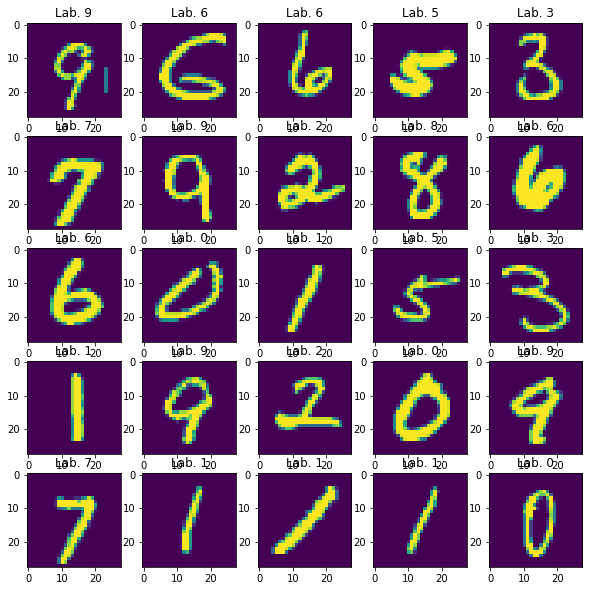

In [8]:
fig, ax = plt.subplots(5,5,figsize=(10,10)) 
ax = ax.ravel()
idx = np.random.permutation(a[1])
for i in range(0,25):
    ax[i].imshow(ims[idx[i]])
    ax[i].set_title(f'Lab. {labels[idx[i]]}')
plt.show()

In [9]:
# Make elastic distortion ? 

# Why is transformation defined the way it is?

# Mention why we DO NOT use shifts or zoom. Or should we test if it works instead?
# Mention why we DO NOT flip 3 or 1 ! Or should we test if it works instead?